# Пример классификации методом kNN с использованием библиотеки

**Постановка задачи** 

Ирисы Фишера — это набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном. Этот набор данных стал уже классическим, и часто используется в литературе для иллюстрации работы различных статистических алгоритмов.

На основании этого набора данных требуется построить правило классификации, определяющее вид растения по данным измерений. Это задача многоклассовой классификации, так как имеется три класса — три вида ириса.

**Понимание данных**

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):
* Длина наружной доли околоцветника (англ. sepal length);
* Ширина наружной доли околоцветника (англ. sepal width);
* Длина внутренней доли околоцветника (англ. petal length);
* Ширина внутренней доли околоцветника (англ. petal width).


## План анализа данных (data mining):

  1. Загрузить данные для обучения
  2. При необходимости обработать данные перед обучением модели
  3. Обучить модель на обучающей выборке
  4. Проверить модель на тестовой выборке

## 1. Загрузить данные для обучения

**Шаг 1.1. Загружаем библиотеки** 

Для корректной работы с данными в python требуется загрузить специальную библиотеку
**pandas**, программную библиотеку на языке python для обработки и анализа данных. С этой библиотекой мы будем разбираться более подробно на ближайшем практическом занятии.

In [ ]:
import pandas as pd 

Для корректной работы с графиками в python требуется загрузить специальную библиотеку
**matplotlib**, программную библиотеку на языке python для визуализации данных двумерной и трехмерной графикой.

Графики используются для облегчения интерпретации полученных результатов, а также в качестве иллюстраций в презентациях и отчетах. 

In [ ]:
import matplotlib.pyplot as plt # загружаем библиотеку и для простоты обращения в коде называем её сокращенно plt
# указываем, чтобы картинки отображались прямо в ноутбуке 
%matplotlib inline 

**Шаг 1.2. Загрузим данные**

Этот датасет настолько популярен, что он есть в библиотеке для машинного обучения. Также его можно скачать с сайта https://www.openml.org/d/61

In [123]:
from sklearn import datasets
iris = datasets.load_iris()


Значения целевой переменной

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**В качестве упражнения попробуйте скачать этот датасет и поработать с ним в гугл колабе.**

*Что важно посмотреть после того, как мы загрузили данные?*
- проверить, что данные действительно загрузились
- посмотреть на данные, чтобы удостовериться, что они правильные: колонки имеют те же названия, что и в таблице и т.д.

Для того чтобы это сделать, нужно вызвать от переменной *training_data* метод **head()**, который выводит первые 5 строк таблицы. 

Для вызова метода объекта необходимо сначала написать *имя объекта*, затем поставить *точку*, затем уже написать *название метода*. Обратите внимание, что в конце обязательно ставить скобочки, потому что метод - это функция и в ней есть аргументы, просто в данном случае мы их не передаем, поэтому оставляем поле пустым

# 2. Обработать данные перед обучением модели

**Шаг 2.1. Проверяем данные на наличие пропусков и типов переменных**



**Шаг 2.2. Выделяем целевую переменную**


В общем виде эти два шага всегда нужны. Но в нашем первом примере мы работаем на всём готовом, поэтому ничего этого делать не будем. 

**Шаг 2.3. Визуализация данных**

Очень часто бывает полезным посмотреть на то, как устроены данные. 

У нас всего 4 переменных + 1 целевая переменная. Построим график, на котором совместим 2 переменных и целевую переменную. Первый график для наружней доли околоцвеника (sepal), второй - для внутренней доли околоцветника (petal). Цветом показаны три класса.

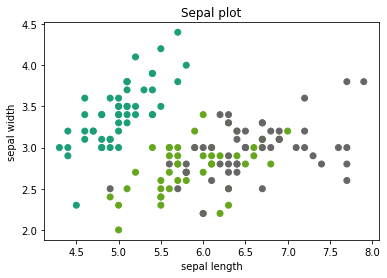

In [ ]:
plt.scatter(iris.data[:,:1],iris.data[:,1:2],c=iris.target, cmap=plt.cm.Dark2)
plt.title('Sepal plot')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

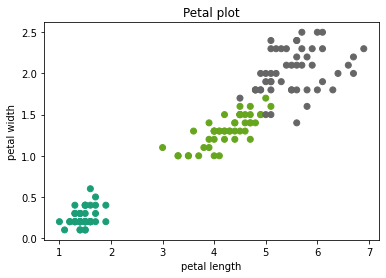

In [ ]:
plt.scatter(iris.data[:,2:3],iris.data[:,3:4],c=iris.target, cmap=plt.cm.Dark2)
plt.title('Petal plot')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

##   3. Обучить модель на обучающей выборке

**Шаг 3.1. Выбираем метод, который будем использовать**

Проще всего начать с простых методов. 
Часто используют несколько методов для построения моделей и сравнивают их между собой.

На выбор метода для построения модели влияет набор признаков, размер выборки, интуиция про то, какая связь между входными переменными и целевой. Но часто решение принимается исходя из того, какая модель сработала лучше.

В этом примере мы используем только kNN, в дальнейшем вам будет предложено его доработать.

Для корректной работы с методами построения моделей в python требуется загрузить специальную библиотеку
**sklearn**, программную библиотеку на языке python для для машинного обучения и анализа данных.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

train_test_split будем использовать для разделения датасета на обучающую (train) и тестовую (test) выборки.

KNeighborsClassifier - для построения модели kNN.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

Выделили треть примеров в тестовую выборку. random_state - для того, чтобы у всех одинаковым образом разделился. Очевидно, что результат на тестовой выборке может зависить от способа разделения.

**Шаг 3.2. Обучить модель**

Как правило для обучения модели используется метод **fit()**, в который передают на вход два аргумента: 
таблицу входных признаков и столбец значений целевой переменной

Попробуем сначала "обучить" модель с одним соседом.

In [ ]:
knn1 = KNeighborsClassifier(1)
knn1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Здесь выведены параметры, с которыми модель настраивалась. Наиболее важные тут: расстояние и количество соседей.

# 4. Провалидировать модель на тестовой выборке

**Шаг 4.1. Оценить модель по выбранной заранее метрике.**


*Если моделей было несколько, то здесь оценивают, какая из них лучше*

Для оценки нам нужно получить прогнозы целевой переменной на тестовых данных. 

Для этого вызовем у каждой модели метод **predict()**, в качестве аргумента передадим тестовую выборку.

In [ ]:
pred1 = knn1.predict(X_test)
pred1

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

Качество модели оценим через точность (accuracy) 

In [ ]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, pred1))

0.98


In [ ]:
knn11 = KNeighborsClassifier(11)
knn11.fit(X_train,y_train)
pred11 = knn11.predict(X_test)
print (accuracy_score(y_test, pred11))

1.0


# Задание

Нужно сделать свою реализацию kNN с доработками.

Алгоритм kNN имеет ряд проблем, которые можно постараться хотя бы частично решить.

Проблема 1. Разные признаки объекта могут иметь разный диапазон значений. Например, значения атрибута x1 меняются в диапазоне от 0 до 1, а атрибута x2 – от 0 до 10000000.Вследствие этого, значения расстояния между объектами сильнее зависят от признаков с большими диапазонами.

Решение 1: Данные необходимо нормализовать.

Проблема 2. Алгоритм может давать разные результаты при разных k. Например, это
может быть из-за шумов (выбросов) в данных.

Решение: Подбирать оптимальную k, т.е. такое число соседей при котором объекты на тестовой выборке будут давать наименьшую ошибку. 

Проблема 3. Иногда евклидово расстояние не подходит, например, значения признаков не являются числовыми.

Решение 3. Пробовать другие метрики расстояния.

Проблема 4. Иногда данные могут быть распределены так, что число соседей k – не
обязательно должно быть фиксированным.

Решение 4. Использовать метод парзеновского окна.

Проблема 5. Не все признаки равнозначны.

Решение 5. Использовать разные ухищрения при нормировке. И/или использовать
взвешенные метрики расстояний.

Проблема 6. Из-за того, что приходится запоминать всю выборку, проблемой могут стать очень большие объёмы обучающей выборки.
Решение 6. Оставлять только типичных представителей классов — эталоны. Избавляться от неинформативных и шумовых объектов.

Проблема 7. Признаков слишком много – это так называемая проблема проклятия
размерности.
Решение 7. Использовать feature engineering или методы снижения размерности.

In [1]:
import operator

def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [2]:
class KNearestNeighbors():
    
    def __init__(self, K, dist):
        self.K = K
        self.dist = dist

    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train

    def predict(self, X_test):
        
        # list to store all our predictions
        predictions = []
        
        # loop over all observations
        for i in range(len(X_test)):            
            
            # calculate the distance between the test point and all other points in the training set
            dist = np.array([self.dist(X_test[i], x_t) for x_t in self.X_train])
            
            # sort the distances and return the indices of K neighbors
            dist_sorted = dist.argsort()[:self.K]
            
            # get the neighbors
            neigh_count = {}

            # for each neighbor find the class
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += 1
                else:
                    neigh_count[self.Y_train[idx]] = 1
            
            # get the most common class label 
            sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
            predictions.append(sorted_neigh_count[0][0])
        return predictions

In [3]:
def Accuracy(Y_val, Y_pred):
    TP = (Y_val * Y_pred).sum()
    TN = np.logical_not(Y_val | Y_pred).sum()
    return (TP + TN) / len(Y_val)

## Проблема 1. Разные признаки объекта могут иметь разный диапазон значений. Например, значения атрибута x1 меняются в диапазоне от 0 до 1, а атрибута x2 – от 0 до 10000000.Вследствие этого, значения расстояния между объектами сильнее зависят от признаков с большими диапазонами.

### Решение 1: Данные необходимо нормализовать.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [5]:
from sklearn.datasets import load_iris

dataset = load_iris()
X, y = dataset.data, dataset.target  # pylint: disable=no-member
# clf = DecisionTreeClassifier(max_depth=2)
# clf.fit(X, y)
# df['label'] = df.target
# df = df.drop(['target'], axis=1)
df= pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                 columns= dataset['feature_names'] + ['target'])
df.columns = df.columns.str.replace(' ', '_')
df = df.rename(columns={"species": "label"})
label = df['target']
# df = df.drop(['target'], axis=1)
df

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length_(cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width_(cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length_(cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width_(cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [7]:
colnames_numeric = df.columns[0:4]
colnames_numeric

Index(['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)',
       'petal_width_(cm)'],
      dtype='object')

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[colnames_numeric] = scaler.fit_transform(df[colnames_numeric])

In [9]:
df

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2.0
146,0.555556,0.208333,0.677966,0.750000,2.0
147,0.611111,0.416667,0.711864,0.791667,2.0
148,0.527778,0.583333,0.745763,0.916667,2.0


## Проблема 2. Алгоритм может давать разные результаты при разных k. Например, это может быть из-за шумов (выбросов) в данных.


### Решение: Подбирать оптимальную k, т.е. такое число соседей при котором объекты на тестовой выборке будут давать наименьшую ошибку. 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [11]:
clf = KNearestNeighbors(4,euc_dist)
clf.fit(X_train, y_train)

In [12]:
from sklearn.metrics import accuracy_score
predictions = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.98


Minimum error:- 0.0 at K = 10


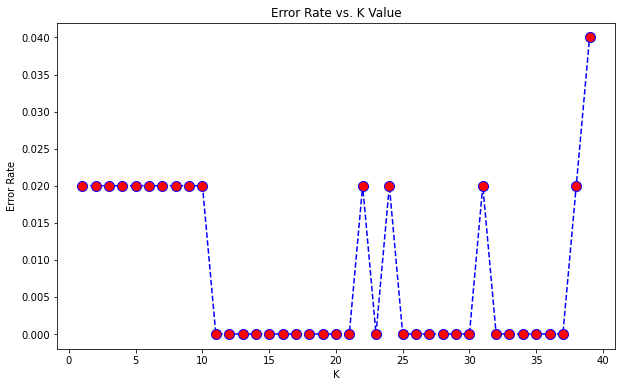

In [13]:
error_rate = []
for i in range(1,40):
 knn = KNearestNeighbors(i,euc_dist)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [14]:
clf = KNearestNeighbors(10,euc_dist)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.98


## Проблема 3. Иногда евклидово расстояние не подходит, например, значения признаков не являются числовыми.

### Решение 3. Пробовать другие метрики расстояния.

In [15]:
def manhattan(p1, p2): 
    dist = 0
    for i in range(len(p1)):
        dist = dist + abs(p1[i]-p2[i])
    return dist;

def minkowski(p1, p2, q): 
    dist = 0
    for i in range(len(p1)):
        dist = dist + abs(p1[i]-p2[i])**q
    dist = np.sqrt(dist)**(1/q)
    return dist;

In [16]:
clf = KNearestNeighbors(10,manhattan)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.98


## Проблема 4. Иногда данные могут быть распределены так, что число соседей k – не обязательно должно быть фиксированным.

### Решение 4. Использовать метод парзеновского окна.


In [17]:
def evclid_distance(x):
    r = 0
    for i in range(len(x)):
        r+=x[i]**2
    return r**0.5

In [18]:
def LOO(data, y, distance, func):
    n = data.shape[0]
    sum_k = {}
    for i in range(n):
        n_data = np.vstack([data[:i], data[i+1:]])
        n_y = np.concatenate([y[:i], y[i+1:]])
        for j in range(1, n-2):
            res = func(data[i], j, n_data, n_y, distance)
            if j not in sum_k:
                sum_k[j] = 0
            if res != y[i]:
                sum_k[j]+=1
    prev = None
    for i in sum_k.items():
        if prev is not None:
            plt.plot([prev[0],i[0]], [prev[1], i[1]], color = "red")
        prev = i
    return min(sum_k.items(), key = lambda item:item[1])[0]

In [19]:
def Rect_kernel(r):
    return (1/2)*(1 if math.fabs(r)<= 1 else 0)

In [20]:
def parzen_variable(x, k, data, y, distance, kernel, weight = None):
    if weight is None:
        weight = [1]*data.shape[0]
    distances = sorted(enumerate(map(lambda i: distance(x-i), data)), key = lambda i: i[1])
    d={}
    for index, i in enumerate(map(lambda x:x[0], distances)):
        if y[i] not in d:
            d[y[i]] = 0
        d[y[i]]+=weight[i]*kernel(distances[index][1]/distances[k+1][1])
    a = max(d.items(), key = lambda i: i[1])
    return a[0]

9

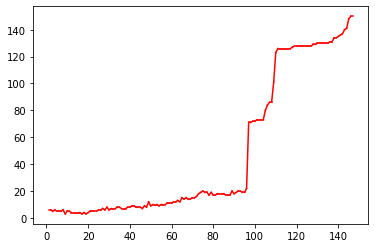

In [21]:
LOO(X, y, evclid_distance, lambda a1, a2, a3, a4, a5: 
    parzen_variable(a1, a2,a3,a4,a5,Rect_kernel))

## Проблема 5. Не все признаки равнозначны.

### Решение 5. Использовать разные ухищрения при нормировке. И/или использовать взвешенные метрики расстояний.


In [236]:
class KNearestNeighbors():
    
    def __init__(self, K, dist):
        self.K = K
        self.dist = dist

    def fit(self, x_train, y_train, x_test, y_test):
        self.X_train = x_train
        self.Y_train = y_train
        self.X_test = x_test
        self.Y_test = y_test
        
    def make_weights(self, k, distances):
        result = np.zeros(k, dtype=np.float32)
        q = list(np.linspace(0.5,1,k))
        q.reverse()
        for i in range(k):
            result[i] = pow(q[i],2)
#         result = np.zeros(k, dtype=np.float32)
#         sum = 0.0
#         for i in range(k):
#             result[i] += 1.0 / distances[i]
#             sum += result[i]
#             print("SUM", sum)
#         result /= sum
        return result
    
    def margin(self, X_test):

        # list to store all our predictions
        margins = []
        
        # loop over all observations
        for i in range(len(X_test)):
            # calculate the distance between the test point and all other points in the training set
            dist = np.array([self.dist(X_test[i], x_t) for x_t in self.X_train])
        
            dist_sorted = dist.argsort()[:self.K]
            dist.sort()
            # sort the distances and return the indices of K neighbors
            
            dist.sort()
            dist_ = dist[:self.K]
            
            dict_weighted = self.make_weights(self.K, dist_)
            # get the neighbors
            neigh_count = {}

            # for each neighbor find the class
            i = 0
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += dict_weighted[i]
                else:
                    neigh_count[self.Y_train[idx]] = dict_weighted[i]
                i += 1
            
            # get the most common class label 
            sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
#             print(sorted_neigh_count)
            if len(neigh_count) == 3:
                margin = sorted_neigh_count[0][1] - (sorted_neigh_count[1][1] + sorted_neigh_count[2][1])
            elif len(neigh_count) == 2:
                margin = sorted_neigh_count[0][1] - sorted_neigh_count[1][1] 
            else:
                margin = sorted_neigh_count[0][1]
            margins.append(margin)
        return margins        

    def predict(self, X_test):
        
        # list to store all our predictions
        predictions = []
        
        # loop over all observations
        for i in range(len(X_test)):
            # calculate the distance between the test point and all other points in the training set
            dist = np.array([self.dist(X_test[i], x_t) for x_t in self.X_train])
        
            dist_sorted = dist.argsort()[:self.K]
            dist.sort()
            # sort the distances and return the indices of K neighbors
            
            dist.sort()
            dist_ = dist[:self.K]
            
            dict_weighted = self.make_weights(self.K, dist_)
            # get the neighbors
            neigh_count = {}

            # for each neighbor find the class
            i = 0
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += dict_weighted[i]
                else:
                    neigh_count[self.Y_train[idx]] = dict_weighted[i]
                i += 1
            
            # get the most common class label 
            sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
#             print(sorted_neigh_count)
            predictions.append(sorted_neigh_count[0][0])
        return predictions
    
    



In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


clf = KNearestNeighbors(4,euc_dist)
clf.fit(X_train, y_train, X_test, y_test)

from sklearn.metrics import accuracy_score
predictions = clf.predict(X_test)
# margin = clf.margin(X, y, X, y)
# print(margin)

print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.98


## Проблема 6. Из-за того, что приходится запоминать всю выборку, проблемой могут стать очень большие объёмы обучающей выборки. 
### Решение 6. Оставлять только типичных представителей классов — эталоны. Избавляться от неинформативных и шумовых объектов.

In [231]:
class KNearestNeighbors():
    
    def __init__(self, K, dist):
        self.K = K
        self.dist = dist

    def fit(self, x_train, y_train, x_test, y_test):
        self.X_train = x_train
        self.Y_train = y_train
        self.X_test = x_test
        self.Y_test = y_test
        
    def make_weights(self, k, distances):
        result = np.zeros(k, dtype=np.float32)
        q = list(np.linspace(0.5,1,k))
        q.reverse()
        for i in range(k):
            result[i] = pow(q[i],2)
#         result = np.zeros(k, dtype=np.float32)
#         sum = 0.0
#         for i in range(k):
#             result[i] += 1.0 / distances[i]
#             sum += result[i]
#             print("SUM", sum)
#         result /= sum
        return result
    
    def margin(self, X_test):

        # list to store all our predictions
        margins = []
        
        # loop over all observations
        for i in range(len(X_test)):
            # calculate the distance between the test point and all other points in the training set
            dist = np.array([self.dist(X_test[i], x_t) for x_t in self.X_train])
        
            dist_sorted = dist.argsort()[:self.K]
            dist.sort()
            # sort the distances and return the indices of K neighbors
            
            dist.sort()
            dist_ = dist[:self.K]
            
            dict_weighted = self.make_weights(self.K, dist_)
            # get the neighbors
            neigh_count = {}

            # for each neighbor find the class
            i = 0
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += dict_weighted[i]
                else:
                    neigh_count[self.Y_train[idx]] = dict_weighted[i]
                i += 1
            
            # get the most common class label 
            sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
#             print(sorted_neigh_count)
            if len(neigh_count) == 3:
                margin = sorted_neigh_count[0][1] - (sorted_neigh_count[1][1] + sorted_neigh_count[2][1])
            elif len(neigh_count) == 2:
                margin = sorted_neigh_count[0][1] - sorted_neigh_count[1][1] 
            else:
                margin = sorted_neigh_count[0][1]
            margins.append(margin)
        return margins        

    def predict(self, X_test):
        
        # list to store all our predictions
        predictions = []
        
        # loop over all observations
        for i in range(len(X_test)):
            # calculate the distance between the test point and all other points in the training set
            dist = np.array([self.dist(X_test[i], x_t) for x_t in self.X_train])
        
            dist_sorted = dist.argsort()[:self.K]
            dist.sort()
            # sort the distances and return the indices of K neighbors
            
            dist.sort()
            dist_ = dist[:self.K]
            
            dict_weighted = self.make_weights(self.K, dist_)
            # get the neighbors
            neigh_count = {}

            # for each neighbor find the class
            i = 0
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += dict_weighted[i]
                else:
                    neigh_count[self.Y_train[idx]] = dict_weighted[i]
                i += 1
            
            # get the most common class label 
            sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
#             print(sorted_neigh_count)
            predictions.append(sorted_neigh_count[0][0])
        return predictions
    
    
    def classify(self, X, y, u, u_ans):
        
        # list to store all our predictions
        predictions = []
        
        # loop over all observations
        for i in range(len(u)):
            # calculate the distance between the test point and all other points in the training set
            dist = np.array([self.dist(u[i], x_t) for x_t in X])
        
            dist_sorted = dist.argsort()[:self.K]
            dist.sort()
            # sort the distances and return the indices of K neighbors
            
            dist.sort()
            dist_ = dist[:self.K]
            
            dict_weighted = self.make_weights(self.K, dist_)
            # get the neighbors
            neigh_count = {}

            # for each neighbor find the class
            i = 0
            for idx in dist_sorted:
                if y[idx] in neigh_count:
                    neigh_count[y[idx]] += dict_weighted[i]
                else:
                    neigh_count[y[idx]] = dict_weighted[i]
                i += 1
            
            # get the most common class label 
            sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
#             print(sorted_neigh_count)
            predictions.append(sorted_neigh_count[0][0])
        return predictions
    
    def _margin(self, X, y, u, u_ans):
        
        # list to store all our predictions
        margins = []
        
        # loop over all observations
        for i in range(len(u)):
            # calculate the distance between the test point and all other points in the training set
            dist = np.array([self.dist(u[i], x_t) for x_t in X])
        
            dist_sorted = dist.argsort()[:self.K]
            dist.sort()
            # sort the distances and return the indices of K neighbors
            
            dist.sort()
            dist_ = dist[:self.K]
            
            dict_weighted = self.make_weights(self.K, dist_)
            # get the neighbors
            neigh_count = {}

            # for each neighbor find the class
            i = 0
            for idx in dist_sorted:
                if y[idx] in neigh_count:
                    neigh_count[y[idx]] += dict_weighted[i]
                else:
                    neigh_count[y[idx]] = dict_weighted[i]
                i += 1
            
            # get the most common class label 
            sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
#             print(sorted_neigh_count)
            if len(neigh_count) == 3:
                margin = sorted_neigh_count[0][1] - (sorted_neigh_count[1][1] + sorted_neigh_count[2][1])
            elif len(neigh_count) == 2:
                margin = sorted_neigh_count[0][1] - sorted_neigh_count[1][1] 
            else:
                margin = sorted_neigh_count[0][1]
            margins.append(margin)
        return margins 
    
    def stolp(self, src_x, src_y, err_num, th, n):
        #Step 2
        support_x = []
        support_y = []
#         src_xkd = KDTree(src_x)
        margins = np.array([self._margin(src_x, src_y, src_x, src_y)]).transpose()
        #Step 3
        x = src_x[margins[:, 0] > th]
        y = src_y[margins[:, 0] > th]
        margins = margins[margins[:, 0] > th]
        ss = np.argsort(margins[:, 0])
        #Step 4
        for ans in np.unique(y):
            for m in ss:
                if y[m] == ans:
                    support_x.append(x[m])
                    support_y.append(y[m])
                    x = np.delete(x, (m), axis=0)
                    y = np.delete(y, (m), axis=0)
                    break
        errors = x.shape[0]
        #Step 5
        while errors > err_num:
            errors = sum(self.classify(np.array(support_x), np.array(support_y), src_x, src_y) != src_y)
            xkd = (np.array(support_x))
            margins = self._margin(np.array(support_x), np.array(support_y), x, y)
            ss = np.argsort(margins)
            to_delete = []
            m = ss[0]
            support_x.append(x[m])
            support_y.append(y[m])
            to_delete.append(m)
            x = np.delete(x, to_delete, axis=0)
            y = np.delete(y, to_delete, axis=0)
        return np.array(support_x), np.array(support_y)

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


clf = KNearestNeighbors(4,euc_dist)
clf.fit(X_train, y_train, X_test, y_test)

from sklearn.metrics import accuracy_score
# predictions = clf.predict(X_test)
# margin = clf.margin(X, y, X, y)
# print(margin)
err_num = 5
th = 0.3
# print(clf.stolp(X_test, y_test, err_num, th, 4))
X_stolp = clf.stolp(X, y, err_num, th, 4)[0]
y_stolp = clf.stolp(X, y, err_num, th, 4)[1]
print('Accuracy:', accuracy_score(y_test, predictions))

errors number 14
errors number 19
errors number 51
errors number 15
errors number 5
errors number 14
errors number 19
errors number 51
errors number 15
errors number 5
Accuracy: 0.98


In [227]:
X_stolp

array([[4.8, 3. , 1.4, 0.3],
       [6.2, 2.2, 4.5, 1.5],
       [6.5, 3. , 5.8, 2.2],
       [6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6. , 2.9, 4.5, 1.5],
       [6.5, 3.2, 5.1, 2. ],
       [6.7, 3.1, 4.7, 1.5],
       [4.7, 3.2, 1.6, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.3, 2.8, 5.1, 1.5]])

In [228]:
y_stolp

array([0, 1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 2, 2])

## Проблема 7. Признаков слишком много – это так называемая проблема проклятия размерности. 
### Решение 7. Использовать feature engineering или методы снижения размерности.

In [289]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)

dataset = load_iris()
X, y = dataset.data, dataset.target  # pylint: disable=no-member
# clf = DecisionTreeClassifier(max_depth=2)
# clf.fit(X, y)
# df['label'] = df.target
# df = df.drop(['target'], axis=1)
df= pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                 columns= dataset['feature_names'] + ['target'])
df.columns = df.columns.str.replace(' ', '_')
df = df.rename(columns={"species": "label"})
label = df.target
df = df.drop(['target'], axis=1)

In [290]:
model.fit(df,label)

RandomForestRegressor(max_depth=10, random_state=1)

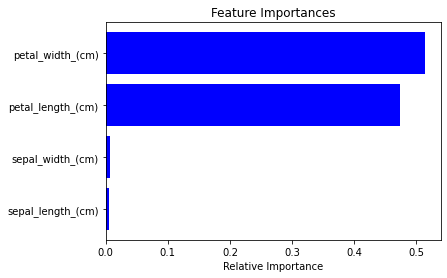

In [291]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [292]:
df.drop(['sepal_length_(cm)', 'sepal_width_(cm)'], axis = 1, inplace=True)

In [293]:
df

,petal_length_(cm),petal_width_(cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3
